In [ ]:
# ! add-apt-repository ppa:graphics-drivers/ppa
# ! apt update
# ! apt install nvidia-384 nvidia-384-dev
# ! apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev

In [ ]:
! nvidia-smi

In [ ]:
!pip install ipython

In [ ]:
!pip install ultralytics

In [ ]:
import os
!yolo mode=checks
from ultralytics import YOLO


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c9S00ql9PbvOYPYVxOOn")
project = rf.workspace("intern-gf9ms").project("yolovs_sam")
dataset = project.version(1).download("yolov8")

In [41]:
!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=15 imgsz=640

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/yolovs_sam-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

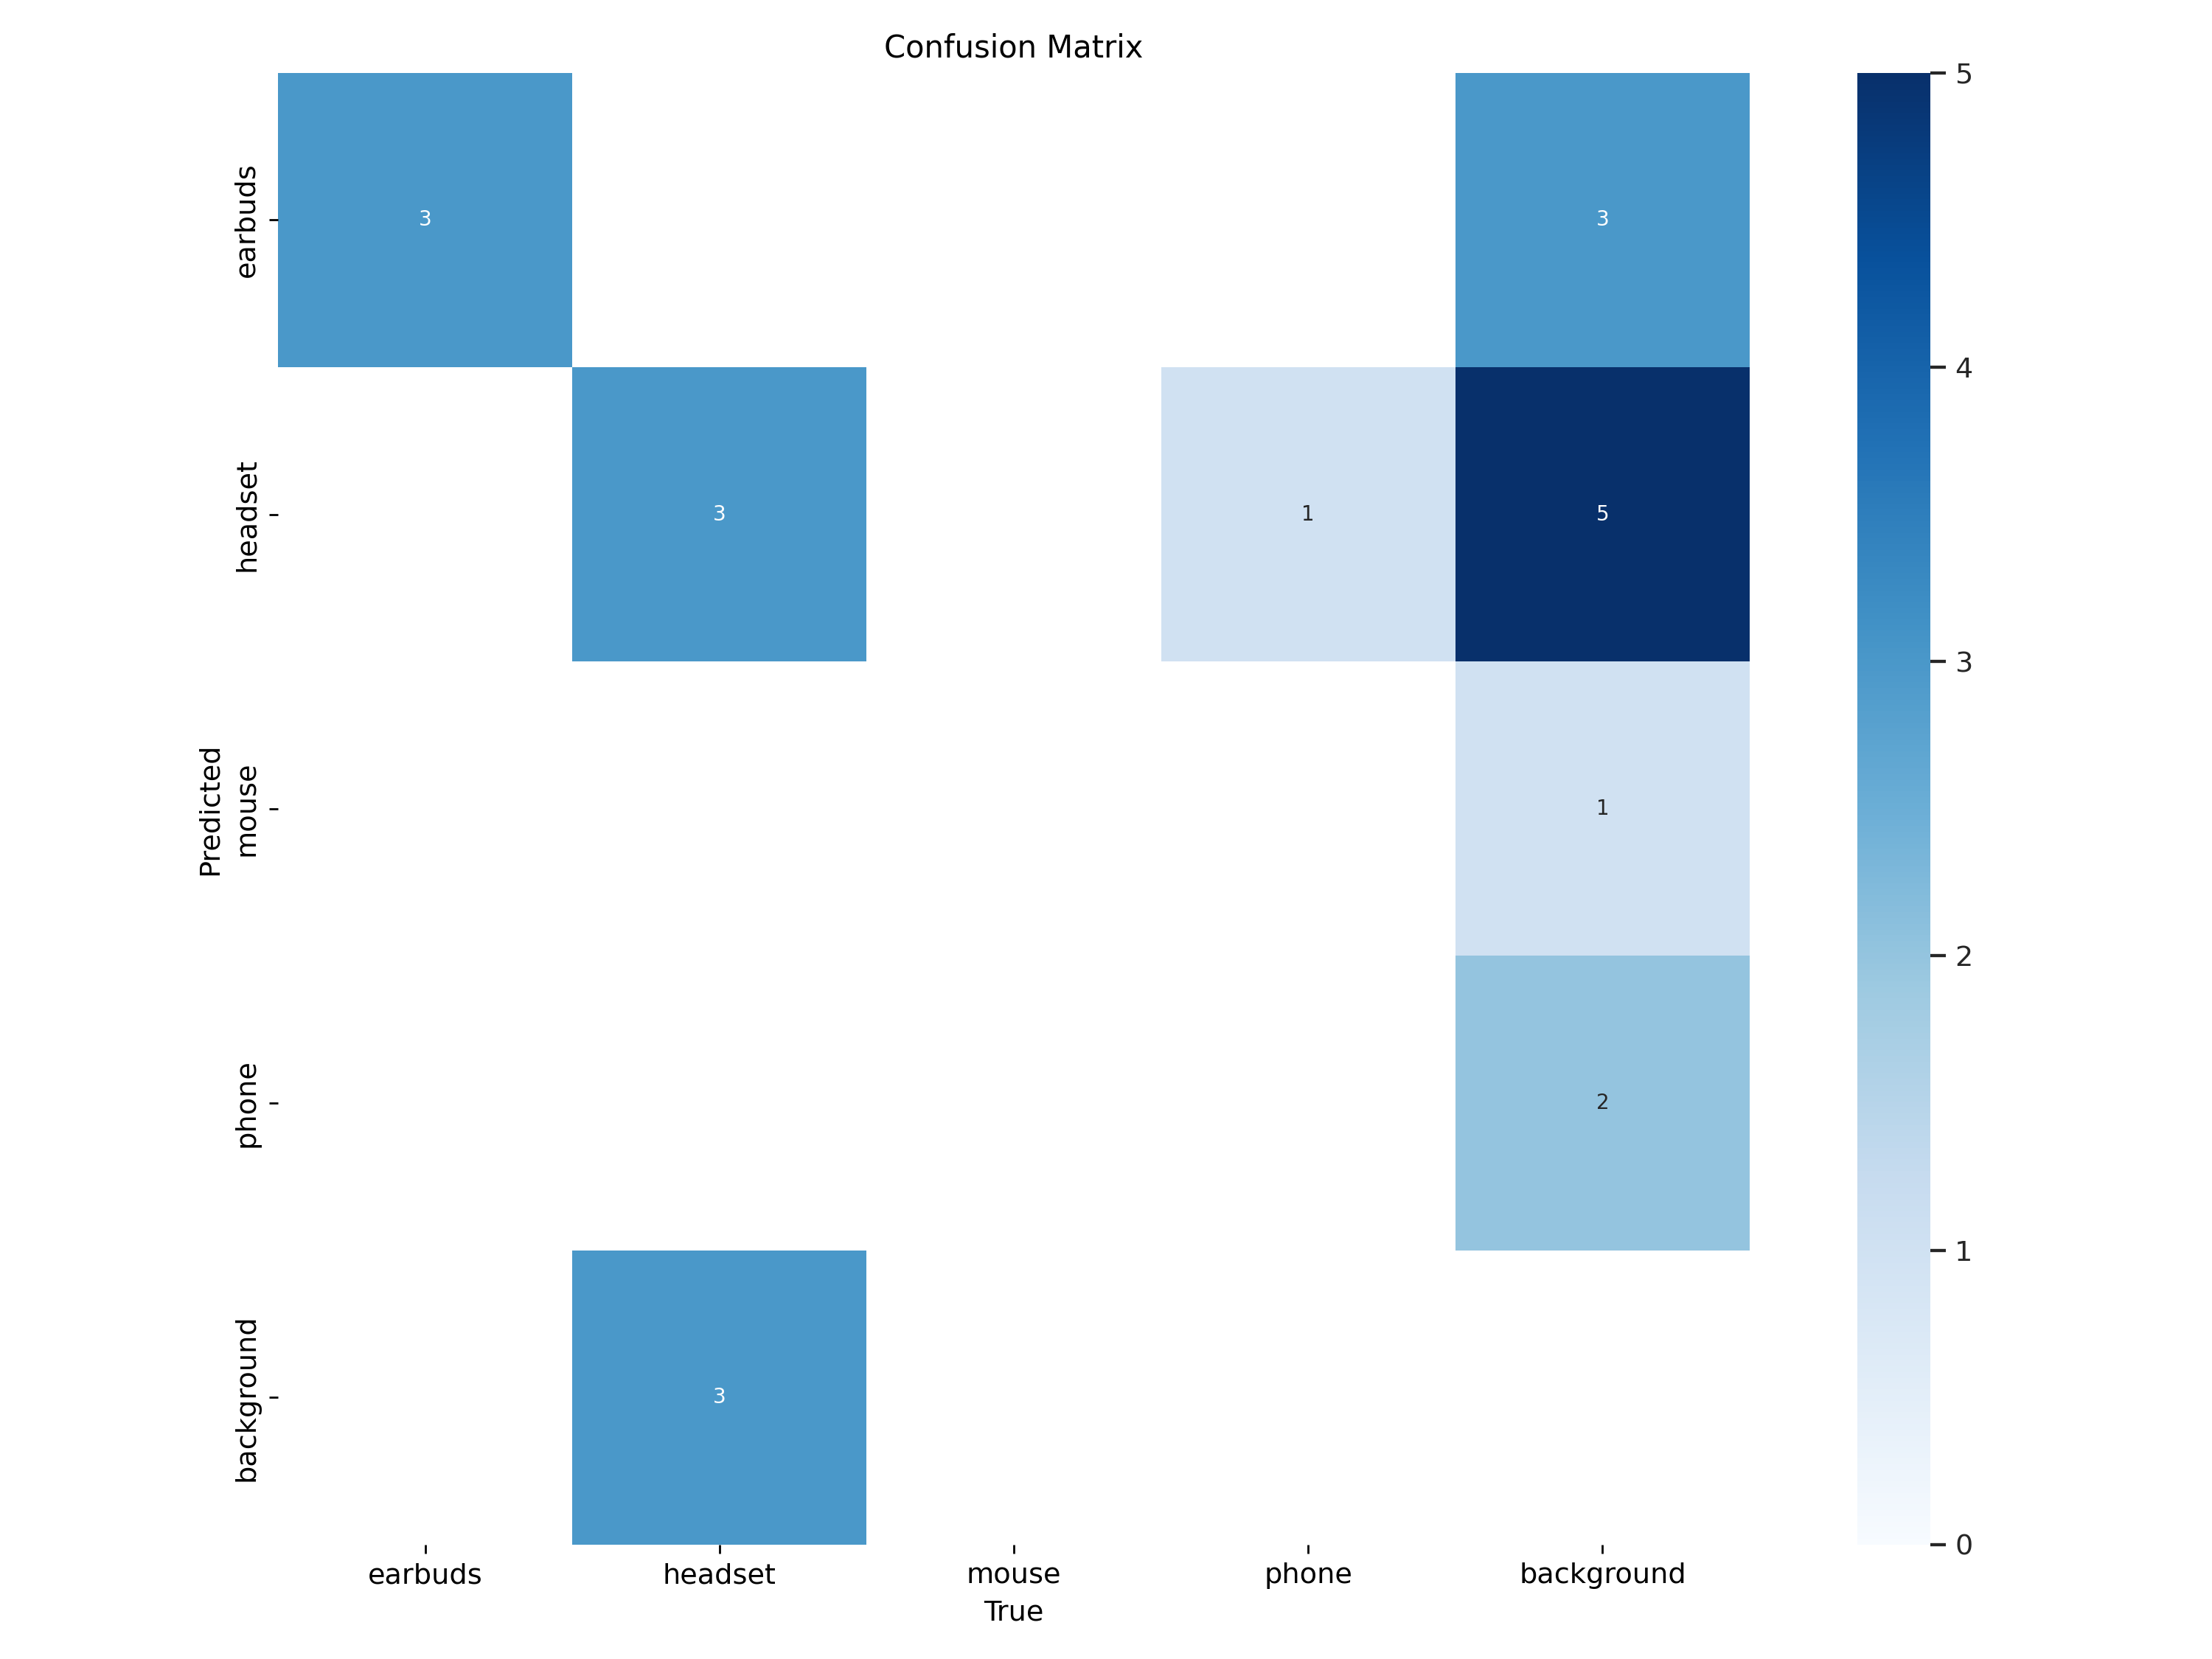

In [42]:
from IPython.display import Image, display

Image(filename=f"/content/runs/segment/train7/confusion_matrix.png", width=600)

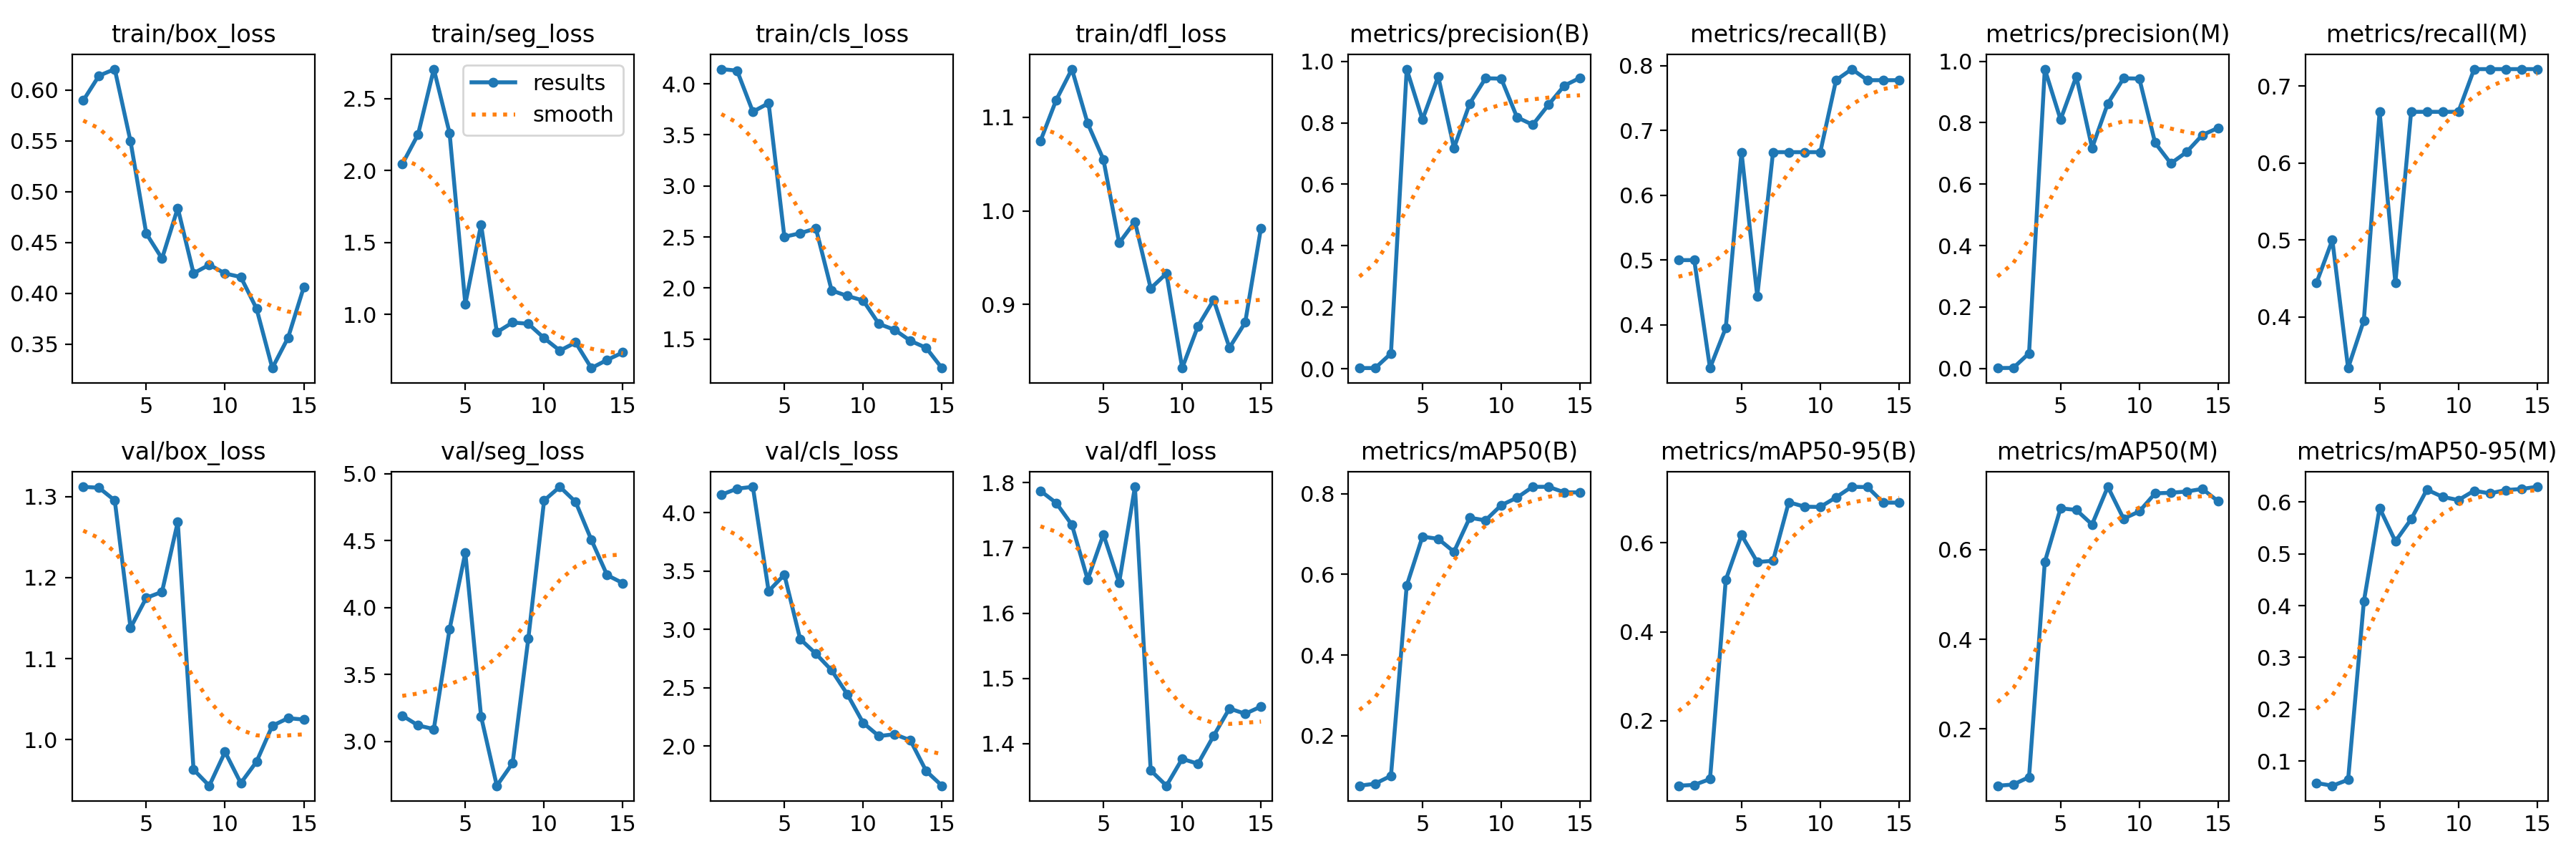

In [43]:
Image(filename=f"/content/runs/segment/train7/results.png", width=600)

In [44]:
!yolo task=segment mode=val model=/content/runs/segment/train7/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914972 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/yolovs_sam-1/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.29it/s]
                   all          7         10      0.859      0.778      0.817      0.725      0.705      0.722      0.729      0.623
               earbuds          7          3      0.748          1      0.995      0.896      0.749          1      0.995      0.896
               headset          7          6      0.941      0.333      0.461      0.284      0.473      0.167      0.197      0.077
                 phone          7          1      0.886          1      0.995      0.995      0.892          1      0.995      0.895
Spee

In [45]:
!yolo task=segment mode=predict model=/content/runs/segment/train7/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914972 parameters, 0 gradients, 220.1 GFLOPs

image 1/4 /content/yolovs_sam-1/test/images/WIN_20231009_23_25_39_Pro_jpg.rf.f3f6262a50c0e6a8768a1a9c25bb16e5.jpg: 480x640 3 headsets, 248.9ms
image 2/4 /content/yolovs_sam-1/test/images/WIN_20231009_23_25_48_Pro_jpg.rf.547588de3ea2eb28a52c5a0d15724383.jpg: 480x640 3 headsets, 61.6ms
image 3/4 /content/yolovs_sam-1/test/images/WIN_20231009_23_26_20_Pro_jpg.rf.8a515d0b1cc7301d5e3798d9becf9484.jpg: 480x640 4 headsets, 1 phone, 55.6ms
image 4/4 /content/yolovs_sam-1/test/images/WIN_20231009_23_26_48_Pro_jpg.rf.69418d0e4a5968cc553e13e2c4baace2.jpg: 480x640 1 earbuds, 4 headsets, 55.6ms
Speed: 1.9ms preprocess, 105.4ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


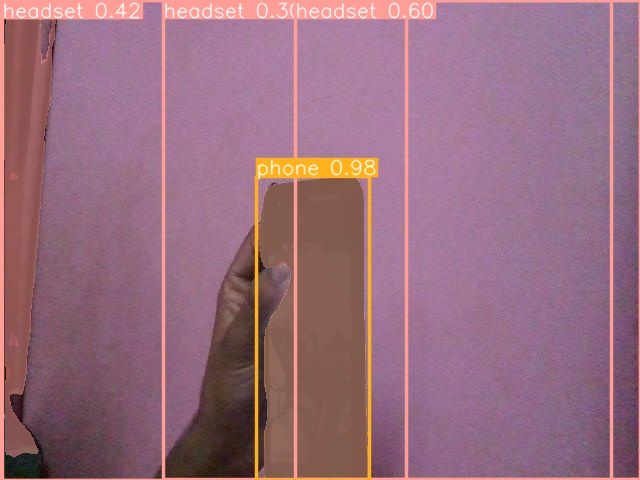

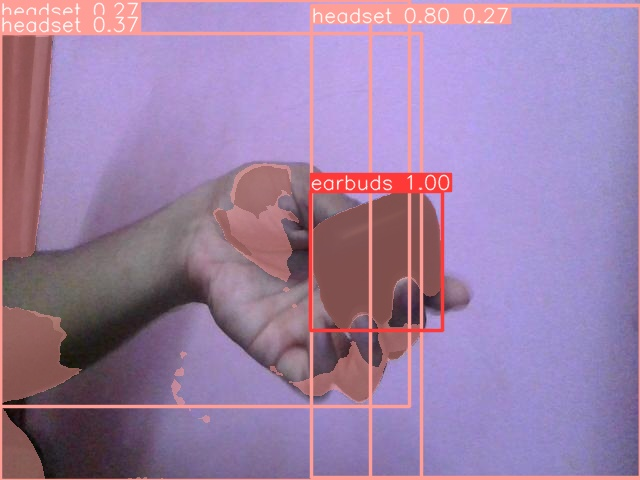

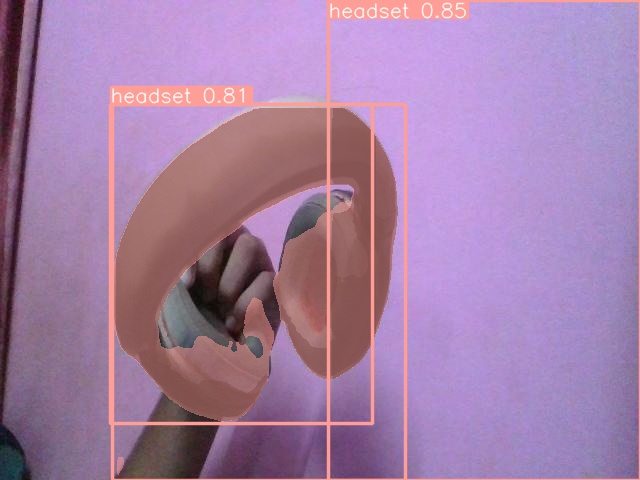

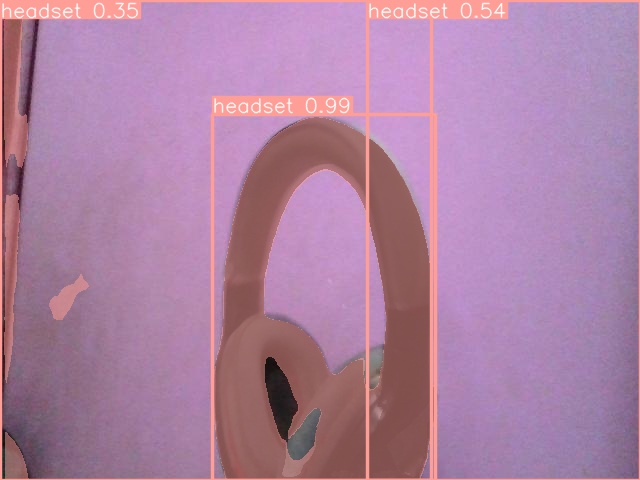

In [46]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict3/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")